In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
#loading the data-set
df=pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Finding the missing values

In [61]:
df.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [62]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<Axes: >

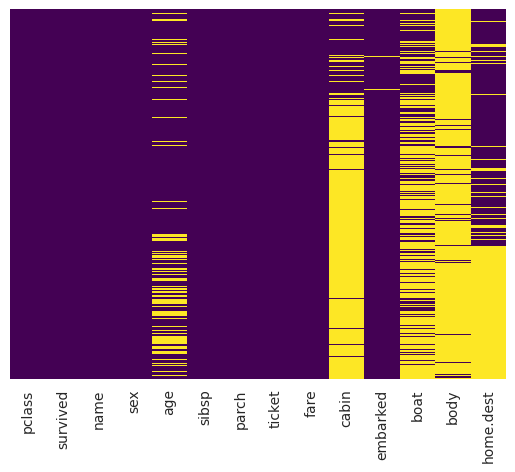

In [63]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='survived', ylabel='count'>

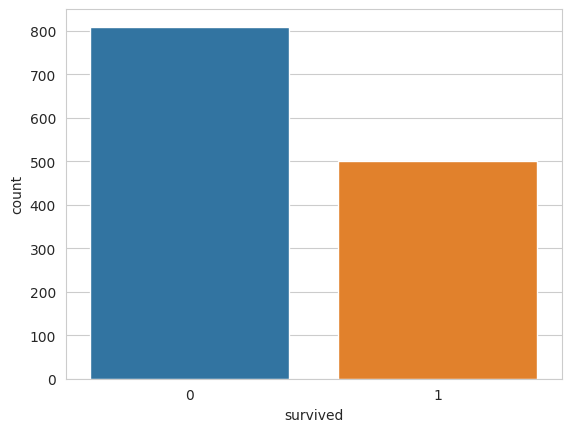

In [64]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df)

<Axes: xlabel='survived', ylabel='count'>

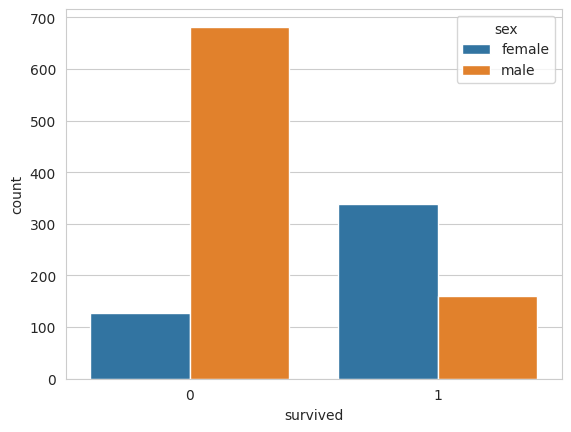

In [65]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=df)

<Axes: xlabel='survived', ylabel='count'>

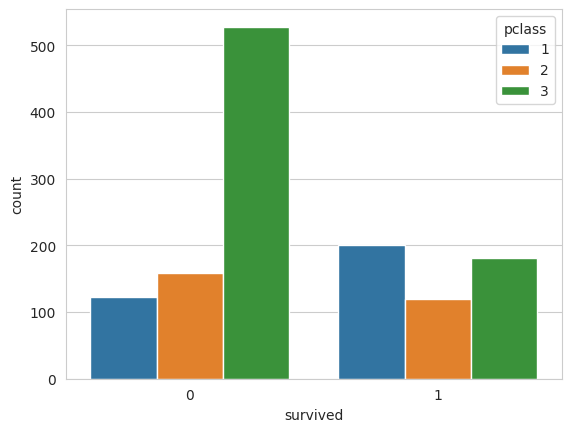

In [66]:
sns.set_style("whitegrid")
sns.countplot(x='survived',hue='pclass',data=df)

/tmp/ipykernel_4249/2090329720.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'].dropna(),kde=False)


<Axes: xlabel='age'>

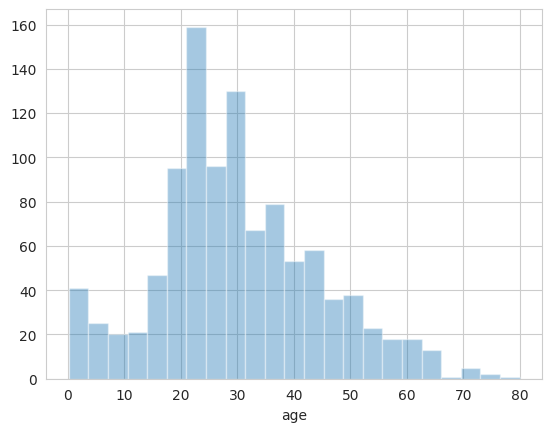

In [67]:
sns.distplot(df['age'].dropna(),kde=False)

<Axes: xlabel='sibsp', ylabel='count'>

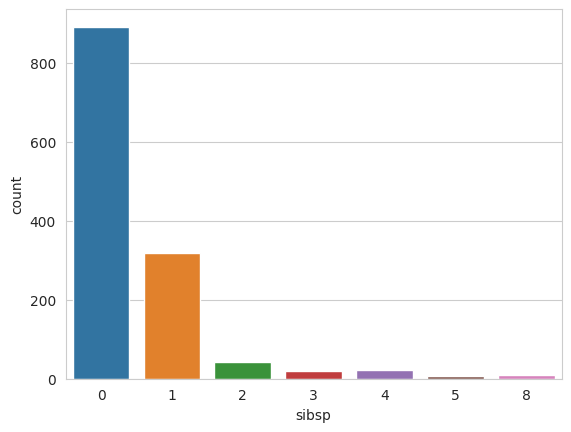

In [68]:
sns.set_style('whitegrid')
sns.countplot(x='sibsp',data=df)

# DATA CLEANING

<Axes: xlabel='pclass', ylabel='age'>

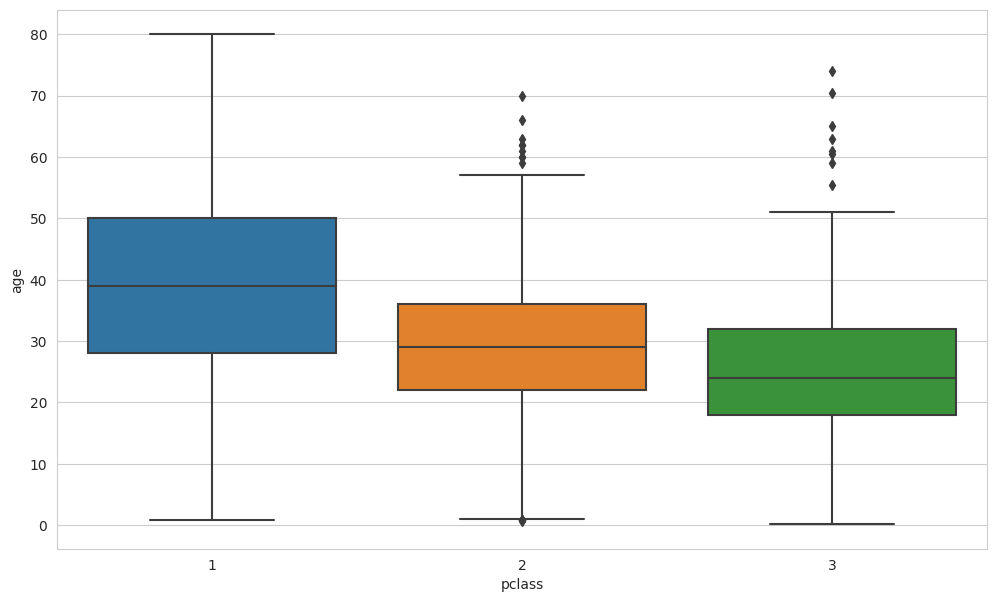

In [69]:
plt.figure(figsize=(12,7))
sns.boxplot(x='pclass',y='age',data=df)

In [70]:
def impute_age(cols):
    
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 37
    
        elif  pclass == 2:
            return 29
    
        else:
            return 24
    else:
        return age
    

In [71]:
df['age']=df[['age','pclass']].apply(impute_age, axis=1)

<Axes: >

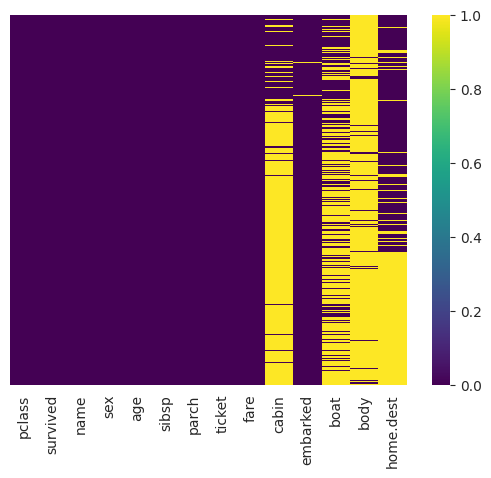

In [72]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [73]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [76]:
df.drop(['cabin','boat','body','home.dest'],axis=1,inplace=True)

In [77]:
df.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        1
embarked    2
dtype: int64

In [82]:
df['fare'].fillna(df['fare'].mean(),inplace=True)

In [86]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [87]:
df.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64